<a href="https://colab.research.google.com/github/SibiSenthur/Python-Projects-/blob/master/XPO_DataChallenege_Muthusamy_SibiSenthur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Importing the necessary libraries for analysis
### preparing the enivornment for file import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

In [ ]:
## Importing the given datafile
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSet.csv', sep = ',')
df.shape
# We have 13,726 rows and 18 features in our dataset
#slicing a sample of the data
df.head(5)

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,HAZMAT_FLAG,FREEZABLE_FLAG,DWELL_TIME,NODE_VISIT_CNT,dock_availability_indicator,forklift_availability_indicator,customer_location_type
0,1,0,0,0,0,0,0,0,17177,12,587.88,False,False,63.483333,37,Y,Y,Business/Commercial
1,2,0,0,0,0,0,0,0,4553,22,1353.33,False,False,61.883333,62,Y,N,Business/Commercial
2,16,0,0,0,0,0,0,0,10355,39,1151.83,False,False,78.833333,373,Y,Y,Business/Commercial
3,1,0,0,0,0,0,0,0,1911,1,330.67,False,False,26.583333,46,Y,Y,Distribution Center
4,0,0,0,0,0,3,0,0,14787,21,832.32,False,False,38.716667,128,Y,Y,Business/Commercial


In [ ]:
df.dtypes ## understanding the data types of each variable

DL                                   int64
DP                                   int64
HE                                   int64
HK                                   int64
HL                                   int64
PU                                   int64
SE                                   int64
SL                                   int64
WEIGHT                               int64
MOTORIZED_PIECES_COUNT               int64
TOTAL_VOLUME_CUBIC_FOOT            float64
HAZMAT_FLAG                           bool
FREEZABLE_FLAG                        bool
DWELL_TIME                         float64
NODE_VISIT_CNT                       int64
dock_availability_indicator         object
forklift_availability_indicator     object
customer_location_type              object
dtype: object

In [ ]:
## Understanding the missing variables(if any) in my dataset

def missing_values_analysis(df):
        # Find the number of total missing values in each column
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_analysis(df) #No Missing Values
## From our Analysis, our dataset doesn't have any missing values in any of the 18 columns (including the target varible) under consideration.

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
########### Understanding on the target varibles ###########
df['DWELL_TIME'].describe()
### Form our analysis, the mean dwell time is around 35 minutes ###

count    13726.000000
mean        35.566812
std         18.944274
min         10.000000
25%         24.350000
50%         31.291667
75%         40.616667
max        217.350000
Name: DWELL_TIME, dtype: float64

Skewness: 2.894131
Kurtosis: 14.147309


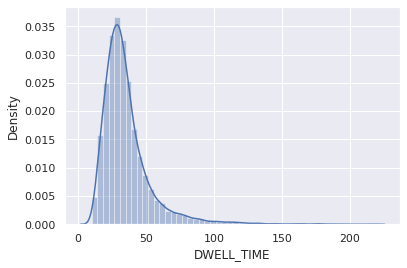

In [ ]:
sns.distplot(df['DWELL_TIME']);
print("Skewness: %f" % df['DWELL_TIME'].skew())
print("Kurtosis: %f" % df['DWELL_TIME'].kurt())
## The target varaibles seem to be exhibiting high kurtosis value;
## We will investigate further if we need to transform our target variable;

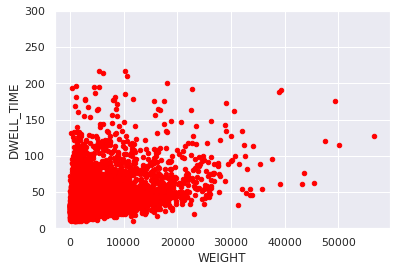

In [ ]:
# scatter plot Weight/Dwell Time
var = 'WEIGHT'
data = pd.concat([df['DWELL_TIME'], df[var]], axis=1)
data.plot.scatter(x=var, y='DWELL_TIME', ylim=(0,300), color = 'red');
## Higher weight stops don't necessarily have a high dwell Time. We don't observe any linear relationship either. 
## As we can see we have a distributions clustered between shipment weight 0 - 20,000 with varying dwell times.

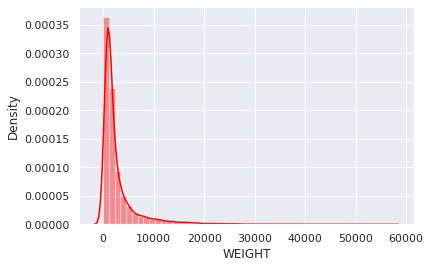

In [ ]:
sns.distplot(df['WEIGHT'], color='red');

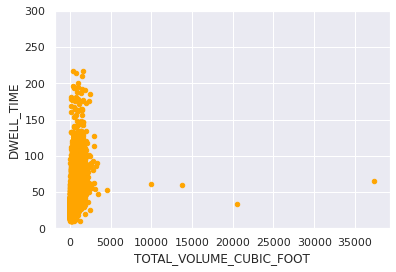

In [ ]:
#scatter plot TOTAL_VOLUME_CUBIC_FOOT/Dwell Time
var = 'TOTAL_VOLUME_CUBIC_FOOT'
data = pd.concat([df['DWELL_TIME'], df[var]], axis=1)
data.plot.scatter(x=var, y='DWELL_TIME', ylim=(0,300), color = 'orange');
## We observe no relationship between TOTAL_VOLUME_CUBIC_FOOT and Dwell Time either.

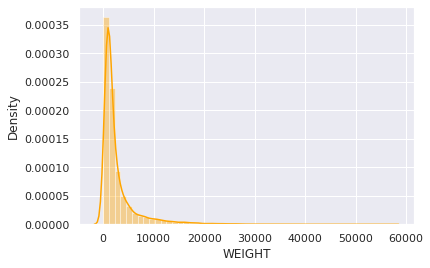

In [ ]:
sns.distplot(df['WEIGHT'], color='orange');

dock_availability_indicator
['Y' 'N' 'U']
forklift_availability_indicator
['Y' 'N' 'U']
customer_location_type
['Business/Commercial' 'Distribution Center' 'Grocery Warehouse'
 'Government Sites: Natural Gas or Oil Field' 'U'
 'Shopping Mall/Strip Mall' 'University/College'
 'Government Sites: Post Office' 'Government Sites: Military'
 'Residential: Business Operating Within a Private Residence'
 'Government Sites: Prison/Correction Facility'
 'Residential: School (K-12), Pre-School, Day Care'
 'Government Sites: Other Government Sites'
 'Construction/Utility Sites: Construction Site' 'Government Sites: Mine'
 'Residential: Residence' 'Residential: Farm'
 'Construction/Utility Sites: Utility Site'
 'Residential: Public Storage Facility' 'Government Sites: Airport'
 'Residential: Place of Worship'
 'Exhibition Sites: Exhibition Site or Convention Center'
 'Residential: Apartment' 'Piers, Wharfs, CFS: Pier or Wharf'
 'Piers, Wharfs, CFS: Container Freight Station']


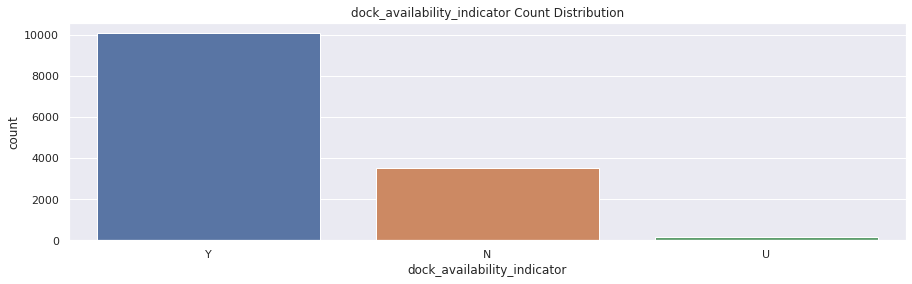

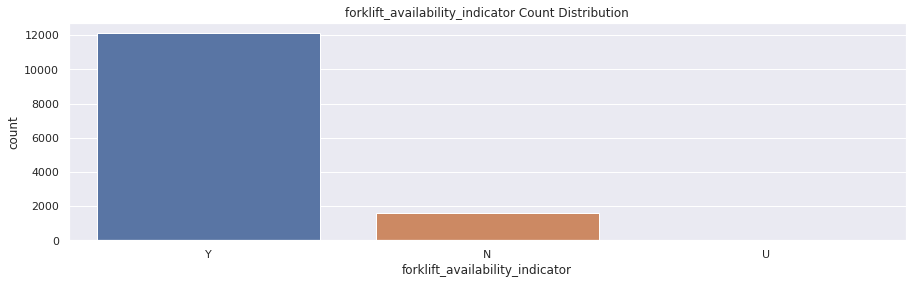

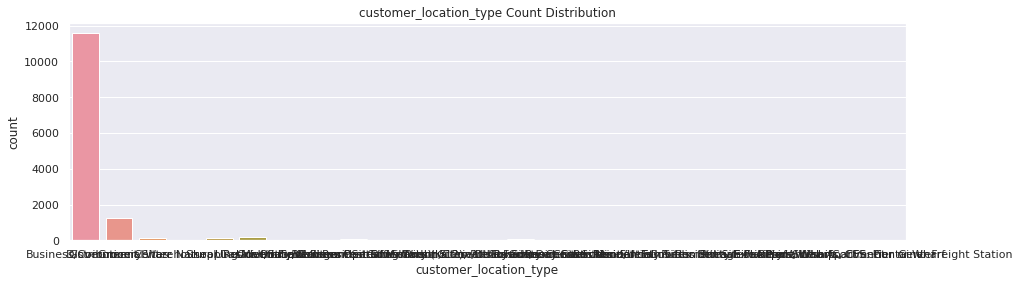

In [ ]:
obj_column = df.dtypes[df.dtypes == 'object'].index
for i in range(0, len(obj_column)):
  print(obj_column[i]) ## columns having categorical datapoints
  print(df[obj_column[i]].unique()) ## Different categories within each feature
for i in range(0, len(obj_column)) :
    fig, ax = plt.subplots(figsize=(15,4))
    sns.countplot(x = obj_column[i], data = df)
    sns.set(font_scale=1)
    ax.set_title('{} Count Distribution'.format(obj_column[i]))
# From our analysis, it seems like most of the Pickups and Delivery Customer Location have Dock Availability and Forklift availability

In [ ]:
### Undetstanding a bit more on the customer location type feature:
df['customer_location_type'].value_counts()
### Most of the customer location types are Business/Commerical (11,575 stops) followed by Distributed centres
### Other location types have minimum stops compared to Business/Commercial centres.

Business/Commercial                                           11575
Distribution Center                                            1254
Shopping Mall/Strip Mall                                        175
Grocery Warehouse                                               144
U                                                               140
Construction/Utility Sites: Construction Site                    54
Government Sites: Military                                       48
University/College                                               39
Residential: Business Operating Within a Private Residence       38
Residential: Residence                                           35
Government Sites: Other Government Sites                         34
Government Sites: Post Office                                    33
Residential: School (K-12), Pre-School, Day Care                 32
Construction/Utility Sites: Utility Site                         29
Residential: Farm                               

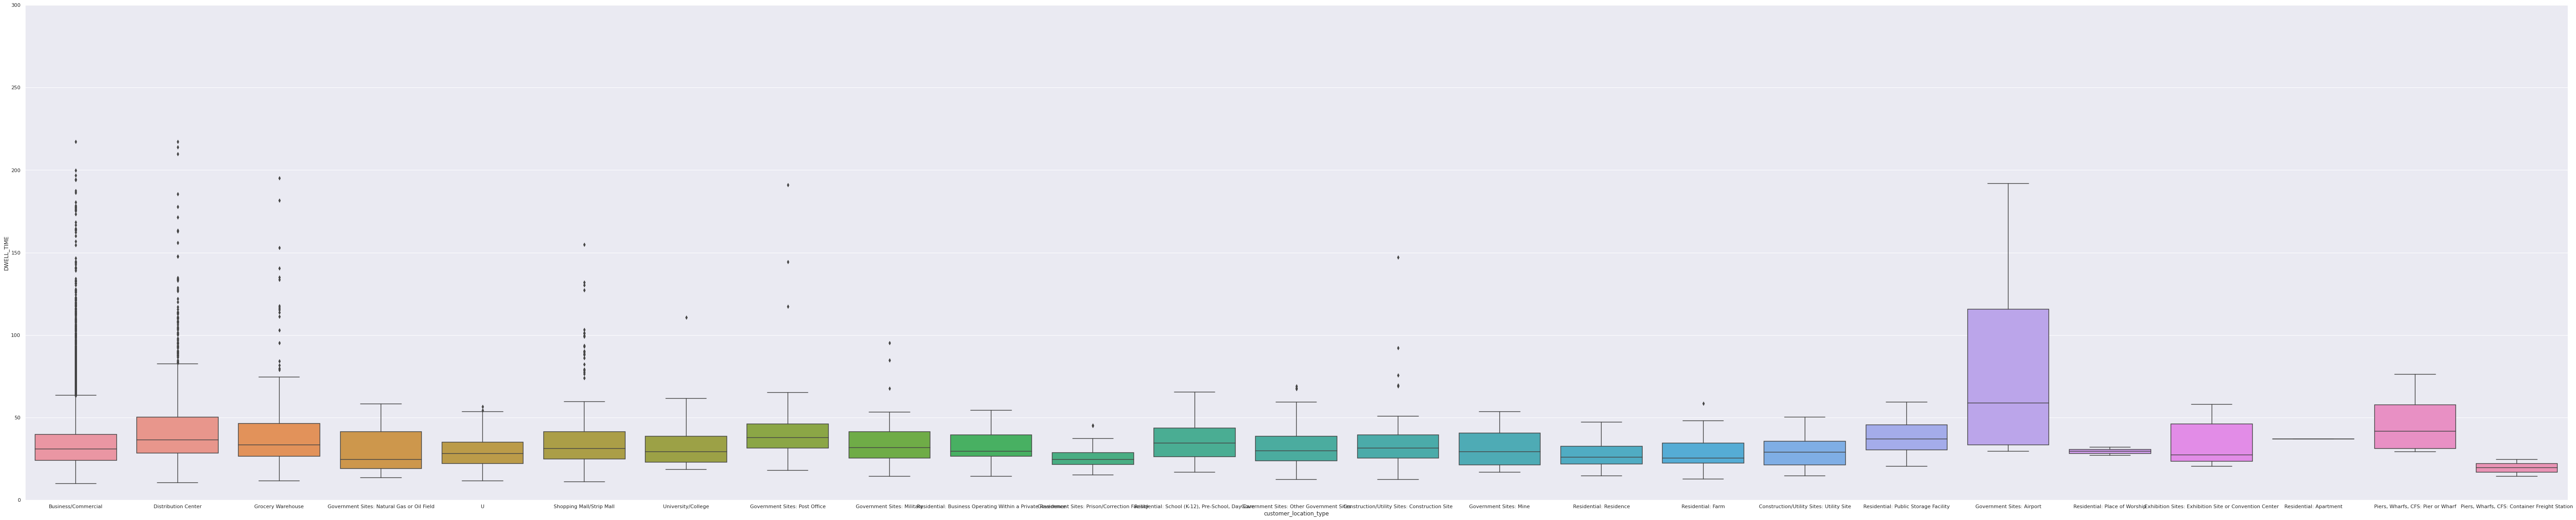

In [ ]:
# Let us try to understand the relationship with categorical features a bit more 
#(customer location type with Dwell Time)
var = 'customer_location_type'
data = pd.concat([df['DWELL_TIME'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(100, 20))
fig = sns.boxplot(x=var, y="DWELL_TIME", data=data)
fig.axis(ymin=0, ymax=300);
#Conclusions
### Overall analysis by observing the distribution of dwell time with customer location type, we don't see any perceivable difference in distribution by customer categories.
### However, there are a few interesting observations:
### We can see the Dwell Time at {Government Sites: Airport} have a higher distribution with Dwell Time (50th Percentile) more than 50 minutes.
### We observe some high stop times at {business commercial}, Distribution centres, Grocery Warehouses
### We might consider addressing the outliers and removing them appropriately without any significant loss of information using Interquartile (IQR) Distances

In [ ]:
### We will try to scale all our numerical features using min-max scaler;
### We will try to maintain the original distribution using min max scaler; doesn't reduce the importance of outliers;
### One-hot/Label encode encode our categorical features;
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df[['DWELL_TIME_SCALED','WEIGHT_SCALED','TOTAL_VOLUME_CUBIC_FOOT_SCALED','MOTORIZED_PIECES_COUNT_SCALED','DL_SCALED', 'DP_SCALED', 'HK_SCALED', 'HE_SCALED','HL_SCALED', 'PU_SCALED','SE_SCALED','SL_SCALED', 'NODE_VISIT_CNT_SCALED']] = min_max_scaler.fit_transform(df[['DWELL_TIME','WEIGHT','TOTAL_VOLUME_CUBIC_FOOT','MOTORIZED_PIECES_COUNT','DL', 'DP', 'HK', 'HE','HL', 'PU','SE','SL', 'NODE_VISIT_CNT']])
df['WEIGHT_SCALED'].head(5)

0    0.302711
1    0.080160
2    0.182445
3    0.033584
4    0.260578
Name: WEIGHT_SCALED, dtype: float64

In [ ]:
df.dtypes

DL                                   int64
DP                                   int64
HE                                   int64
HK                                   int64
HL                                   int64
PU                                   int64
SE                                   int64
SL                                   int64
WEIGHT                               int64
MOTORIZED_PIECES_COUNT               int64
TOTAL_VOLUME_CUBIC_FOOT            float64
HAZMAT_FLAG                           bool
FREEZABLE_FLAG                        bool
DWELL_TIME                         float64
NODE_VISIT_CNT                       int64
dock_availability_indicator         object
forklift_availability_indicator     object
customer_location_type              object
DWELL_TIME_SCALED                  float64
WEIGHT_SCALED                      float64
TOTAL_VOLUME_CUBIC_FOOT_SCALED     float64
MOTORIZED_PIECES_COUNT_SCALED      float64
DL_SCALED                          float64
DP_SCALED  

In [ ]:
obj_column = df.dtypes[df.dtypes == 'object']
# We will try to label encode the obj_column

In [ ]:
### Customer Location Type Label Encoded;
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['customer_location_type_LE'] = labelencoder.fit_transform(df['customer_location_type'])
df['customer_location_type_LE'].value_counts()
df['customer_location_type_LE'].head(5)
## We label encode the customer location type column, converting the location type from categorical to numberic;

0    0
1    0
2    0
3    3
4    0
Name: customer_location_type_LE, dtype: int64

In [ ]:
# We One-hot Encode the remaining categorical attributes;
# Using dummies values approach:
# Each Categorical column is converted into numerical column and assigned a 1/0 based on the presence of that category level within each row;
# using dummy value encoding we don't implicitly assume any heirarchy or levels by each category of feature values.
dum_hazmat =  pd.get_dummies(df, columns=["HAZMAT_FLAG",], prefix=["HAZMAT_FLAG_TYPE"])
dum_freezable = pd.get_dummies(dum_hazmat, columns=["FREEZABLE_FLAG",], prefix=["FREEZABLE_FLAG_TYPE"])
dum_dockavail = pd.get_dummies(dum_freezable, columns=["dock_availability_indicator",], prefix=["dock_availability_indicator_TYPE"])
dum_forkliftavail = pd.get_dummies(dum_dockavail, columns=["forklift_availability_indicator",], prefix=["forklift_availability_indicator_TYPE"])

In [ ]:
# We drop features, whose values have been transformed
dum_forkliftavail = dum_forkliftavail.drop(['DWELL_TIME','customer_location_type','WEIGHT','TOTAL_VOLUME_CUBIC_FOOT','MOTORIZED_PIECES_COUNT','DL', 'DP', 'HK', 'HE','HL', 'PU','SE','SL', 'NODE_VISIT_CNT'], axis=1)

In [ ]:
## Now, we have transformed all our feature, we will try to fit the features
## Before that, we would want to know which variables contribute to our prediction; 
## variable selection and model parameter tuning will be performed in subsequent steps before model fitting.
dum_forkliftavail.dtypes
df_transform = dum_forkliftavail.copy()

In [ ]:
# viewing the dataframe after transformation;
df_transform.head()

,DWELL_TIME_SCALED,WEIGHT_SCALED,TOTAL_VOLUME_CUBIC_FOOT_SCALED,MOTORIZED_PIECES_COUNT_SCALED,DL_SCALED,DP_SCALED,HK_SCALED,HE_SCALED,HL_SCALED,PU_SCALED,SE_SCALED,SL_SCALED,NODE_VISIT_CNT_SCALED,customer_location_type_LE,HAZMAT_FLAG_TYPE_False,HAZMAT_FLAG_TYPE_True,FREEZABLE_FLAG_TYPE_False,FREEZABLE_FLAG_TYPE_True,dock_availability_indicator_TYPE_N,dock_availability_indicator_TYPE_U,dock_availability_indicator_TYPE_Y,forklift_availability_indicator_TYPE_N,forklift_availability_indicator_TYPE_U,forklift_availability_indicator_TYPE_Y
0,0.257937,0.302711,0.015326,0.049793,0.047619,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.009123,0,1,0,1,0,0,0,1,0,0,1
1,0.250221,0.080160,0.035811,0.091286,0.095238,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.016480,0,1,0,1,0,0,0,1,1,0,0
2,0.331967,0.182445,0.030418,0.161826,0.761905,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.108005,0,1,0,1,0,0,0,1,0,0,1
3,0.079977,0.033584,0.008443,0.004149,0.047619,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.011772,3,1,0,1,0,0,0,1,0,0,1
4,0.138494,0.260578,0.021868,0.087137,0.000000,0.0,0.0,0.0,0.0,0.078947,0.0,0.0,0.035903,0,1,0,1,0,0,0,1,0,0,1


In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_, grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("Root Mean Squared Error",mean_squared_error(y_test,y_predict,squared=False))
    return y_test,y_predict

In [ ]:
from sklearn.model_selection import train_test_split
## 70 - 30 split - training data and test data
X_all = df_transform.drop(['DWELL_TIME_SCALED'], axis=1)
y_all = df_transform['DWELL_TIME_SCALED']
num_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [ ]:
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test ,y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best params:",best_params)

Root Mean Squared Error 0.07667463643479097
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [ ]:
## Lets understand how variable selection impacts our model; selecting variables and obtaining the model using Grid search;
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 30))
sel.fit(X_train, y_train)
#To see which features are important we can use get_support method on the fitted model.
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat) #### Use the below variables to see if RMSE decreases;

Index(['WEIGHT_SCALED', 'TOTAL_VOLUME_CUBIC_FOOT_SCALED',
       'MOTORIZED_PIECES_COUNT_SCALED', 'PU_SCALED', 'NODE_VISIT_CNT_SCALED'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
## 70 - 30 split - training data and test data
X_all = df_transform[['WEIGHT_SCALED', 'TOTAL_VOLUME_CUBIC_FOOT_SCALED',
       'MOTORIZED_PIECES_COUNT_SCALED', 'PU_SCALED', 'NODE_VISIT_CNT_SCALED']]
y_all = df_transform['DWELL_TIME_SCALED']
num_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=230)

In [ ]:
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test ,y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best params:",best_params)
    ### 0.07624337387511537 we see a marginal decrease in RMSE Error after selecting the appropriate variables using the same grid search method.

Root Mean Squared Error 0.07624337387511537
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


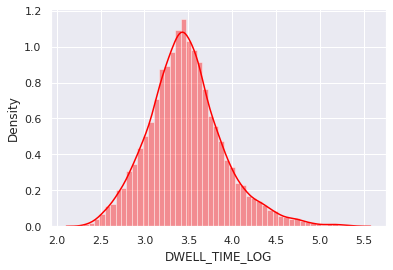

In [ ]:
### Log Transforming the target variable din't have any appreciable impact on the final RMSE value.
df_transform['DWELL_TIME_LOG'] = np.log(df['DWELL_TIME'])
sns.distplot(df_transform['DWELL_TIME_LOG'], color='red');
min_max_scaler = preprocessing.MinMaxScaler()
df_transform['DWELL_TIME_SCALED1'] = min_max_scaler.fit_transform(df_transform['DWELL_TIME_LOG'].values.reshape(-1,1))
from sklearn.model_selection import train_test_split
## 70 - 30 split - training data and test data
X_all = df_transform[['WEIGHT_SCALED', 'TOTAL_VOLUME_CUBIC_FOOT_SCALED',
       'MOTORIZED_PIECES_COUNT_SCALED', 'PU_SCALED', 'NODE_VISIT_CNT_SCALED']]
y_all = df_transform['DWELL_TIME_SCALED1']
num_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=230)

In [ ]:
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test ,y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Root Mean Squared Error 0.1209061794401104
Best Score: 0.26744455886171614
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}


In [ ]:
import xgboost
from sklearn.metrics import mean_squared_error

In [ ]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print ("Root Mean Squared Error",mean_squared_error(y_test,predictions,squared=False))

[01:05:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error 0.0749206628918128


In [ ]:
## Conclusions;
# -- Developed a predictive model to predict dwell time at stops using various features; (my Best RMSE Value 0.07624337387511537 using Random forest regressor after scaling my target variable between (0-1))
# -- During our model development process, I did exploratory data analysis, data preparation for model input, model parameter tuning (used grid search), variable selection techniques to evaluate our model on RMSE
# -- Our important variables which contribute to model selection are: Weight, Total volume cubic, MOTORIZED_PIECES_COUNT, PU, Nodes Visited Count.
# -- I implemented Minmax scaler, One hot Encoding, Label Encoder for handling my numeric and categorical variables respectively
# -- With additional time we should be able to address model performance by removing a few outliers seen in our EDA - But the business context of removing an outlier is unknown. Hence outlier are not handled during the current model process.
# -- We can also improve our model by grid tuning, increasing the bandwidth of parameters we can tune our model for (probably) using randomized search CV, account for kurtosis/skewness of each of the numerical features and target variable distribution as well.(by taking appropriate transformations)
# -- Additionaly, we can use advanced bagging, boosting, Neural network methods to further tune our RMSE: Interpretability of the model and RMSE metric compared to other models will be factored into consideration.
# -- We can further cluster stops and then predict dwell on each cluster; Each cluster may exhibit different characterisitics as a function of weight/business type. 
# -- From a business context, we can further understand if the dwell is due to customer delay, driver delay or any other extraneous factors.